Ash Ketchum va a enfrentarse a un nuevo líder de gimnasio especializado en Pokémon de tipo planta. Para tener una ventaja estratégica, Ash necesita analizar dos equipos de Pokémon y decidir cuál le dará mejores posibilidades de victoria. Quiere construir un equipo puramente ofensivo.

Los dos equipos que tiene listos son los siguientes:

- Equipo 1: Charizard, Dragonair, Seadra, Pidgeot, Kadabra, Butterfree.
- Equipo 2: Feraligatr, Snorlax, Gyarados, Fearow, Zapdos, Hypno.
En esta práctica, deberás usar Python y las librerías vistas en clase para acceder a una API pública de Pokémon y analizar las características de cada equipo, eligiendo el más adecuado.

Finálmente, usa una librería gráfica de tu elección para representar la comparación de los equipos. Puede ser mostrando una tabla, gráfica...

Restricciones:

- Ash solo puede usar Pokemons incluidos hasta la segunda generación.

- La puntuación de un Pokemon será obtenida en base a su estadística de ataque (attack) desde las estadísticas base (base_stat)

- Los Pokemon con ventaja de tipo (Fuego, Volador, Veneno, Hielo y Bicho) puntuarán con un multiplicador de 1.5

- Los Pokemon con desventaja de tipo (Agua, Piedra, Tierra) puntuarán con un multiplicador de 0.5

- Los Pokemon sin ventaja de tipo tendrán un multiplicador de 1

 

Rúbrica de la práctica:

Consulta correcta a la pokeapi: 2 puntos

Cálculo de ventajas y desventajas de cada pokemon: 2,5 puntos

Cálculo de equipo vencedor correcto: 4 puntos

Representación gráfica: 1,5 puntos

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Definir las listas de equipos y las ventajas/desventajas
equipo_1 = ["charizard", "dragonair", "seadra", "pidgeot", "kadabra", "butterfree"]
equipo_2 = ["feraligatr", "snorlax", "gyarados", "fearow", "zapdos", "hypno"]
ventaja = {"fire", "flying", "poison", "ice", "bug"}
desventaja = {"water", "rock", "ground"}

C:\Users\juanc\AppData\Local\Temp\ipykernel_13236\3165406878.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Función para obtener datos de la API
def obtener_estadisticas(pokemon):
    url = f"https://pokeapi.co/api/v2/pokemon/{pokemon.lower()}" # Esto asegura que la URL sea correcta, ya que la API es sensible a las mayúsculas y las minúsculas
    # Request a la API
    response = requests.get(url)
    # Obtener datos en formato JSON
    data = response.json()
    return data # Devuelve el JSON completo

# Función para filtrar ataque y tipos del JSON
def filtrar_datos(pokemon_data):
    attack = next(stat['base_stat'] for stat in pokemon_data['stats'] if stat['stat']['name'] == 'attack')
    types = [t['type']['name'] for t in pokemon_data['types']]
    return attack, types

In [3]:
# Inicializar las listas que guardarán los datos filtrados de los equipos
datos_equipo_1 = []
datos_equipo_2 = []

# Obtener y almacenar solo los datos filtrados (ataque y tipos) para cada Pokémon de ambos equipos
for pokemon in equipo_1:
    datos = obtener_estadisticas(pokemon)
    attack, types = filtrar_datos(datos)
    datos_equipo_1.append({'name': pokemon, 'attack': attack, 'types': types})

for pokemon in equipo_2:
    datos = obtener_estadisticas(pokemon)
    attack, types = filtrar_datos(datos)
    datos_equipo_2.append({'name': pokemon, 'attack': attack, 'types': types})

In [4]:
# Crear el DataFrame para el equipo 1
datos_tabla_equipo_1 = [
    {
        'name': datos['name'],
        'attack': datos['attack'],
        'types': datos['types']
    }
    for datos in datos_equipo_1
]
df_equipo_1 = pd.DataFrame(datos_tabla_equipo_1)

# Crear el DataFrame para el equipo 2
datos_tabla_equipo_2 = [
    {
        'name': datos['name'],
        'attack': datos['attack'],
        'types': datos['types']
    }
    for datos in datos_equipo_2
]
df_equipo_2 = pd.DataFrame(datos_tabla_equipo_2)

# Imprimir los DataFrames con etiquetas claras
print("Equipo 1:")
print(df_equipo_1)
print("\nEquipo 2:")
print(df_equipo_2)


Equipo 1:
         name  attack             types
0   charizard      84    [fire, flying]
1   dragonair      84          [dragon]
2      seadra      65           [water]
3     pidgeot      80  [normal, flying]
4     kadabra      35         [psychic]
5  butterfree      45     [bug, flying]

Equipo 2:
         name  attack               types
0  feraligatr     105             [water]
1     snorlax     110            [normal]
2    gyarados     125     [water, flying]
3      fearow      90    [normal, flying]
4      zapdos      90  [electric, flying]
5       hypno      73           [psychic]


In [5]:
# Función para calcular la puntuación ajustada de ataque
def calcular_puntuacion(attack, types):
    multiplicador = 1
    # Verificar si tiene ventaja
    if any(t in ventaja for t in types):
        multiplicador *= 1.5
    # Verificar si tiene desventaja
    if any(t in desventaja for t in types):
        multiplicador *= 0.5
    return attack * multiplicador

# Calcular las puntuaciones de ambos equipos usando los datos ya filtrados
def calcular_puntuacion_total(datos_equipo):
    puntuacion_total = 0
    for datos in datos_equipo:
        attack = datos['attack']
        types = datos['types']
        puntuacion_total += calcular_puntuacion(attack, types)
    return puntuacion_total

# Obtener puntuación total de cada equipo
puntuacion_equipo_1 = calcular_puntuacion_total(datos_equipo_1)
puntuacion_equipo_2 = calcular_puntuacion_total(datos_equipo_2)

# Imprimir puntuaciones totales para ver la diferencia
print("Puntuación Equipo 1:", puntuacion_equipo_1)
print("Puntuación Equipo 2:", puntuacion_equipo_2)

# Determinar equipo ganador
equipo_ganador = "Equipo 1" if puntuacion_equipo_1 > puntuacion_equipo_2 else "Equipo 2"


Puntuación Equipo 1: 465.0
Puntuación Equipo 2: 599.25


In [6]:
# Crear el DataFrame para el equipo 1 con la puntuación final de cada ataque (multiplicado por ventajas y desventajas)
datos_tabla_equipo_1 = [
    {
        'name': datos['name'],
        'attack': datos['attack'],
        'types': datos['types'],
        'adjusted_score': calcular_puntuacion(datos['attack'], datos['types'])
    }
    for datos in datos_equipo_1
]
df_equipo_1 = pd.DataFrame(datos_tabla_equipo_1)

# Agregar una fila para el total del equipo 1
total_score_1 = df_equipo_1['adjusted_score'].sum()
df_equipo_1 = pd.concat([df_equipo_1, pd.DataFrame([{'name': 'Total', 'attack': '', 'types': '', 'adjusted_score': total_score_1}])], ignore_index=True)

# Crear el DataFrame para el equipo 2 con la puntuación final de cada ataque (multiplicado por ventajas y desventajas)
datos_tabla_equipo_2 = [
    {
        'name': datos['name'],
        'attack': datos['attack'],
        'types': datos['types'],
        'adjusted_score': calcular_puntuacion(datos['attack'], datos['types'])
    }
    for datos in datos_equipo_2
]
df_equipo_2 = pd.DataFrame(datos_tabla_equipo_2)

# Agregar una fila para el total del equipo 2
total_score_2 = df_equipo_2['adjusted_score'].sum()
df_equipo_2 = pd.concat([df_equipo_2, pd.DataFrame([{'name': 'Total', 'attack': '', 'types': '', 'adjusted_score': total_score_2}])], ignore_index=True)

# Imprimir los DataFrames
print("Equipo 1:")
print(df_equipo_1)
print("\nEquipo 2:")
print(df_equipo_2)


Equipo 1:
         name attack             types  adjusted_score
0   charizard     84    [fire, flying]           126.0
1   dragonair     84          [dragon]            84.0
2      seadra     65           [water]            32.5
3     pidgeot     80  [normal, flying]           120.0
4     kadabra     35         [psychic]            35.0
5  butterfree     45     [bug, flying]            67.5
6       Total                                    465.0

Equipo 2:
         name attack               types  adjusted_score
0  feraligatr    105             [water]           52.50
1     snorlax    110            [normal]          110.00
2    gyarados    125     [water, flying]           93.75
3      fearow     90    [normal, flying]          135.00
4      zapdos     90  [electric, flying]          135.00
5       hypno     73           [psychic]           73.00
6       Total                                     599.25


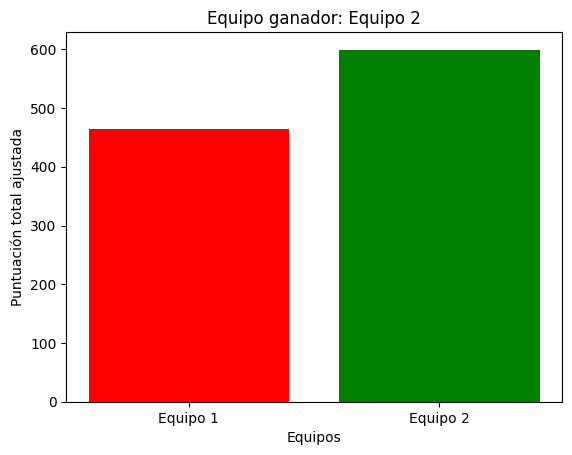

In [7]:
# Visualización
equipos = ['Equipo 1', 'Equipo 2']
puntuaciones = [puntuacion_equipo_1, puntuacion_equipo_2]

plt.bar(equipos, puntuaciones, color=['red', 'green'])
plt.xlabel("Equipos")
plt.ylabel("Puntuación total ajustada")
plt.title(f"Equipo ganador: {equipo_ganador}")
plt.show()

Sobre la práctica final, aplicar la siguiente modificación:

En la práctica anterior hemos aplicado los multiplicadores para tener las ventajas de tipo. Sin embargo, para calcular el valor del equipo hemos usado el ataque físico, lo cual no sería exacto para saber como de útil es cada uno de los Pokemon. En este caso, queremos fijarnos sobre los atributos de ataque especial y defensa especial, que nos permitirán hacer una aproximación más exacta:

- Qué equipo es mejor en términos de ataque especial
- Qué equipo es mejor en términos de defensa especial
- Qué equipo es mejor en el cómputo global
- Qué Pokemon es el más débil del equipo en base a esas estadísticas y, por lo tanto, debería ser cambiado.

In [9]:
# Función para calcular las puntuaciones extendidas de ataque especial y defensa especial
def calcular_puntuaciones_extendido(datos_equipo):
    puntuaciones_ataque_especial = []
    puntuaciones_defensa_especial = []
    
    for datos in datos_equipo:
        stats = obtener_estadisticas(datos['name'])  # Obtener estadísticas completas desde la API
        ataque_especial = next(stat['base_stat'] for stat in stats['stats'] if stat['stat']['name'] == 'special-attack')
        defensa_especial = next(stat['base_stat'] for stat in stats['stats'] if stat['stat']['name'] == 'special-defense')
        
        multiplicador = 1
        if any(t in ventaja for t in datos['types']):
            multiplicador *= 1.5
        if any(t in desventaja for t in datos['types']):
            multiplicador *= 0.5

        puntuaciones_ataque_especial.append(ataque_especial * multiplicador)
        puntuaciones_defensa_especial.append(defensa_especial * multiplicador)
    
    return puntuaciones_ataque_especial, puntuaciones_defensa_especial


In [10]:
# Calcular puntuaciones para ambos equipos
puntuaciones_equipo1_ataque_especial, puntuaciones_equipo1_defensa_especial = calcular_puntuaciones_extendido(datos_equipo_1)
puntuaciones_equipo2_ataque_especial, puntuaciones_equipo2_defensa_especial = calcular_puntuaciones_extendido(datos_equipo_2)

In [12]:
# Cálculo de totales y cómputo global equipo 1
total_equipo1_ataque_especial = sum(puntuaciones_equipo1_ataque_especial)
print("Puntuación total de ataque especial equipo 1:", total_equipo1_ataque_especial)
total_equipo1_defensa_especial = sum(puntuaciones_equipo1_defensa_especial)
print("Puntuación total de defensa especial equipo 1:", total_equipo1_defensa_especial)
total_equipo1_global = total_equipo1_ataque_especial - total_equipo1_defensa_especial
print("Puntuación global equipo 1:", total_equipo1_global)

Puntuación total de ataque especial equipo 1: 641.0
Puntuación total de defensa especial equipo 1: 515.0
Puntuación global equipo 1: 126.0


In [13]:
# Cálculo de totales y cómputo global equipo 2
total_equipo2_ataque_especial = sum(puntuaciones_equipo2_ataque_especial)
print("Puntuación total de ataque especial equipo 2:", total_equipo2_ataque_especial)
total_equipo2_defensa_especial = sum(puntuaciones_equipo2_defensa_especial)
print("Puntuación total de defensa especial equipo 2:", total_equipo2_defensa_especial)
total_equipo2_global = total_equipo2_ataque_especial - total_equipo2_defensa_especial
print("Puntuación global equipo 2:", total_equipo2_global)

Puntuación total de ataque especial equipo 2: 501.5
Puntuación total de defensa especial equipo 2: 568.0
Puntuación global equipo 2: -66.5


In [17]:
# Calcular los cómputos globales para cada Pokémon y crear una tabla
def generar_tabla_computos(datos_equipo, puntuaciones_ataque_especial, puntuaciones_defensa_especial):
    computos = []
    for datos, ataque_especial, defensa_especial in zip(datos_equipo, puntuaciones_ataque_especial, puntuaciones_defensa_especial):
        computo_global = ataque_especial - defensa_especial
        computos.append({
            'name': datos['name'],
            'special-attack': ataque_especial,
            'special-defense': defensa_especial,
            'global-score': computo_global
        })
    return pd.DataFrame(computos)

# Generar las tablas para ambos equipos
tabla_equipo1 = generar_tabla_computos(datos_equipo_1, puntuaciones_equipo1_ataque_especial, puntuaciones_equipo1_defensa_especial)
tabla_equipo2 = generar_tabla_computos(datos_equipo_2, puntuaciones_equipo2_ataque_especial, puntuaciones_equipo2_defensa_especial)

# Mostrar las tablas con los resultados
print("Cómputos finales del Equipo 1:")
print(tabla_equipo1)
print("\nCómputos finales del Equipo 2:")
print(tabla_equipo2)

Cómputos finales del Equipo 1:
         name  special-attack  special-defense  global-score
0   charizard           163.5            127.5          36.0
1   dragonair            70.0             70.0           0.0
2      seadra            47.5             22.5          25.0
3     pidgeot           105.0            105.0           0.0
4     kadabra           120.0             70.0          50.0
5  butterfree           135.0            120.0          15.0

Cómputos finales del Equipo 2:
         name  special-attack  special-defense  global-score
0  feraligatr            39.5             41.5          -2.0
1     snorlax            65.0            110.0         -45.0
2    gyarados            45.0             75.0         -30.0
3      fearow            91.5             91.5           0.0
4      zapdos           187.5            135.0          52.5
5       hypno            73.0            115.0         -42.0


In [34]:
# Añadir una columna "team" para diferenciar las tablas
tabla_equipo1['team'] = 'Equipo 1'
tabla_equipo2['team'] = 'Equipo 2'

# Función para encontrar el Pokémon más débil según los criterios de desempate (Ver el pokémon que tiene el menor ataque especial, si hay empate, ver el que tiene la menor defensa especial, si hay empate, desempatar alfabéticamente)
def encontrar_pokemon_mas_debil_desde_tabla(tabla):
    # Filtrar los Pokémon con el cómputo global más bajo
    min_global_score = tabla['global-score'].min()
    pokemons_minimos = tabla[tabla['global-score'] == min_global_score]
    print(pokemons_minimos)
    
    # Si solo hay un Pokémon, devolverlo directamente
    if len(pokemons_minimos) == 1:
        return pokemons_minimos.iloc[0]['name']
    
    # Desempatar con el menor ataque especial
    min_special_attack = pokemons_minimos['special-attack'].min()
    pokemons_minimos = pokemons_minimos[pokemons_minimos['special-attack'] == min_special_attack]
    
    # Si sigue habiendo empate, desempatar con la menor defensa especial
    if len(pokemons_minimos) > 1:
        min_special_defense = pokemons_minimos['special-defense'].min()
        pokemons_minimos = pokemons_minimos[pokemons_minimos['special-defense'] == min_special_defense]
    
    # Si aún hay empate, desempatar alfabéticamente
    return pokemons_minimos.sort_values(by='name').iloc[0]['name']

# Encontrar el Pokémon más débil para ambos equipos
pokemon_mas_debil_equipo1 = encontrar_pokemon_mas_debil_desde_tabla(tabla_equipo1)
print(f"\nPokémon más débil del Equipo 1: {pokemon_mas_debil_equipo1}\n")
pokemon_mas_debil_equipo2 = encontrar_pokemon_mas_debil_desde_tabla(tabla_equipo2)
print(f"\nPokémon más débil del Equipo 2: {pokemon_mas_debil_equipo2}")


        name  special-attack  special-defense  global-score      team
1  dragonair            70.0             70.0           0.0  Equipo 1
3    pidgeot           105.0            105.0           0.0  Equipo 1

Pokémon más débil del Equipo 1: dragonair

      name  special-attack  special-defense  global-score      team
1  snorlax            65.0            110.0         -45.0  Equipo 2

Pokémon más débil del Equipo 2: snorlax
